#                                        NN CLASSIFIER

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neural_network as nn

In [2]:
# Load Training Data and shuffling

data = np.loadtxt(open("corners.txt","r"),delimiter=" ")
X=data[:,:-1]
y=data[:,-1:].flatten()
m, n = X.shape
print("shape of data:",m,n)

shape of data: 1000 2


In [3]:
#defining object of nn and shuffling data
clf=nn.nn()
clf.shuffle_in_unison(X,y)

In [4]:
#normalising data and initialising different variables
X,_=clf.normalize(X)
alpha=6
iterations=6000
LAMBDA=0
hidden_layer_structure=np.array([10,5,10,5])

In [5]:
#dividing training data and testing data in the ratio - 70% : 30%

X_train=X[:(7*m)//10,:]
y_train=y[:(7*m)//10]
X_test=X[(7*m)//10:,:]
y_test=y[(7*m)//10:]

------------------------------------------Visualising Training Data------------------------------------------------------------

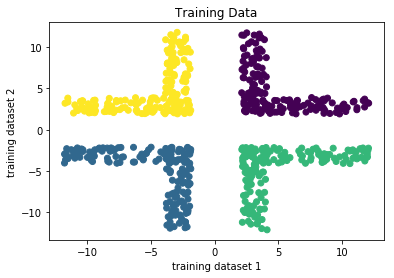

In [6]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.xlabel("training dataset 1")
plt.ylabel("training dataset 2")
plt.title("Training Data")
plt.show()

In [7]:
#optimizing parameters
clf.fit(X_train,y_train,hidden_layer_structure)
parameters=clf.gradient_descent(alpha,iterations,LAMBDA)

labels are: [0. 1. 2. 3.]
[ 2 10  5 10  5  4]


------------------------------------------Visualising Predicted Data------------------------------------------------------------

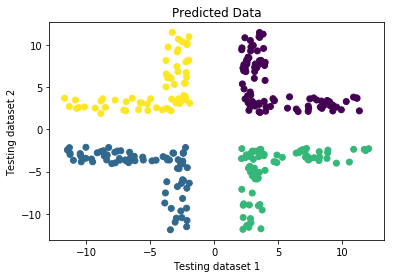

In [8]:
y_pred=clf.predict(X_test)
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)
plt.xlabel("Testing dataset 1")
plt.ylabel("Testing dataset 2")
plt.title("Predicted Data")
plt.show()

  -------------------------------------------Some Predictions---------------------------------------------------

In [9]:
indices=np.random.choice(m,10)
print("Test set:      ",y[indices])
print("My predictions:",clf.predict(X[indices,:]))

Test set:       [2. 1. 0. 3. 3. 0. 2. 0. 3. 2.]
My predictions: [2. 1. 0. 3. 3. 0. 2. 0. 3. 2.]


-------------------------------------Calculating accuracy--------------------------------------------------------------------

In [10]:
#Calculating accuracy
print("accuracy of my model=",clf.accuracy(X_test,y_test),"%")

accuracy of my model= 100.0 %


In [12]:
#calculating accuracy of sklearn model
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(10,5,10,5))
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
A=(y_pred==y_test)
acc=np.mean(A)*100
print("accuracy of sklearn=",acc,"%")

accuracy of sklearn= 100.0 %
